In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import time

In [2]:
white_wine = pd.read_csv("winequality-white.csv")
red_wine = pd.read_csv("winequality-red.csv")

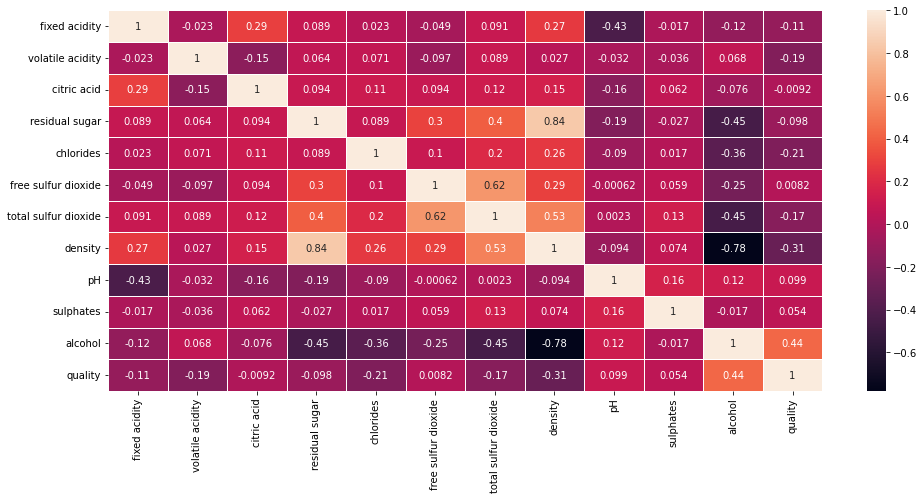

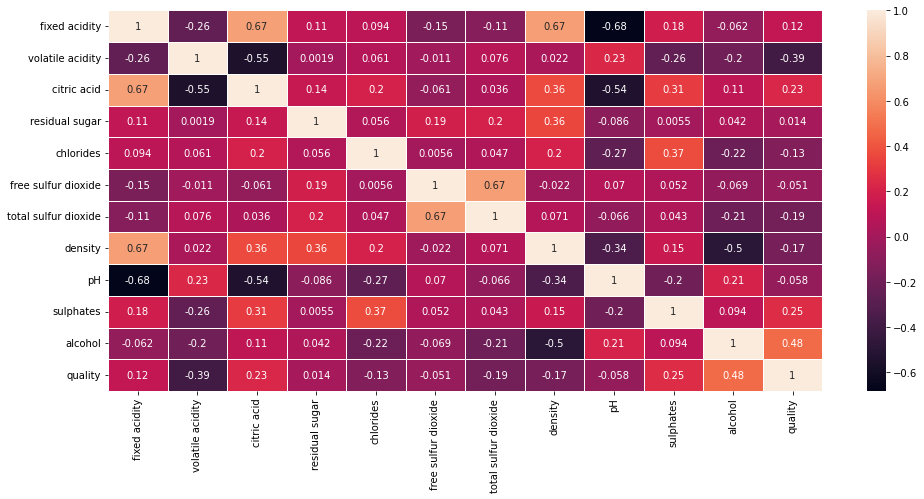

In [3]:
plt.figure(figsize=(16, 7))

# Finding the correlation between the columns in the dataset
sns.heatmap(white_wine.corr(), annot=True, fmt='0.2g', linewidths=1)
plt.show()

plt.figure(figsize=(16, 7))
sns.heatmap(red_wine.corr(), annot=True, fmt='0.2g', linewidths=1)

plt.show()

In [4]:
grid_dict = {}
acc_dict = {}
time_dict = {}

In [5]:
# Dropping total sulfur dioxide for white
white_wine = white_wine.drop('total sulfur dioxide', axis=1)
# Dropping free sulfur dioxide for red
red_wine = red_wine.drop('free sulfur dioxide', axis=1)

red_wine["Wine"] = "RED"
white_wine["Wine"] = "WHITE"

wines = pd.merge(white_wine, red_wine, how='outer')
X_wines = wines.drop('quality', axis=1)
y_wines = wines['quality']

red_wine = red_wine.drop('Wine', axis=1)
white_wine = white_wine.drop('Wine', axis=1)

# Assigning X to data and y to target
y_white = white_wine['quality']
X_white = white_wine.drop('quality', axis=1)
# Assigning X to data and y to target for red
y_red = red_wine['quality']
X_red = red_wine.drop('quality', axis=1)


In [6]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.25, stratify=y_white, random_state=42)

# Red
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.25, stratify=y_red, random_state=42)

# Both
X_train, X_test, y_train, y_test = train_test_split(X_wines, y_wines, test_size=0.25, stratify=y_wines, random_state=42)

In [7]:
# Normalizing the data
# White
std_white = StandardScaler()
X_train_white = std_white.fit_transform(X_train_white)
X_test_white = std_white.transform(X_test_white)

# Red
std_red = StandardScaler()
X_train_red = std_red.fit_transform(X_train_red)
X_test_red = std_red.transform(X_test_red)

In [10]:
# K Nearest Neighbour Classifier
start_time_white = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
knn_acc1_white = accuracy_score(y_test_white, knn.predict(X_test_white))
# Parameters for GridSearchCV
param_grid = {'n_neighbors': [1, 2, 5, 10, 20],
			  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
			  'weights': ['uniform', 'distance']
			  }

grid = GridSearchCV(knn, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_white, y_train_white)
grid_predictions = grid.predict(X_test_white)
knn2 = KNeighborsClassifier(n_neighbors=grid.best_estimator_.n_neighbors, algorithm=grid.best_estimator_.algorithm,
							weights=grid.best_estimator_.weights)
knn2.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
knn_acc2_white = accuracy_score(y_test_white, knn2.predict(X_test_white))
grid_dict["knn_acc_white"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["KNN_white"] = [knn_acc1_white, knn_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["KNN_white"] = end_time_white

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [11]:
# K Nearest Neighbour Classifier
start_time_red = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
knn_acc1_red = accuracy_score(y_test_red, knn.predict(X_test_red))
# Parameters for GridSearchCV
param_grid = {'n_neighbors': [1, 2, 5, 10, 20],
			  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
			  'weights': ['uniform', 'distance']
			  }

grid = GridSearchCV(knn, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_red, y_train_red)
grid_predictions = grid.predict(X_test_red)
knn2 = KNeighborsClassifier(n_neighbors=grid.best_estimator_.n_neighbors, algorithm=grid.best_estimator_.algorithm,
							weights=grid.best_estimator_.weights)
knn2.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
knn_acc2_red = accuracy_score(y_test_red, knn2.predict(X_test_red))
grid_dict["knn_acc_red"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["KNN_red"] = [knn_acc1_red, knn_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["KNN_red"] = end_time_red

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [12]:
# DecisionTree Classifier
start_time_white = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
dt_acc1_white = accuracy_score(y_test_white, dt.predict(X_test_white))
# Parameters for GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
			  'splitter': ['best', 'random'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None]}

grid = GridSearchCV(dt, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_white, y_train_white)
grid_predictions = grid.predict(X_test_white)
dt2 = DecisionTreeClassifier(criterion=grid.best_estimator_.criterion, splitter=grid.best_estimator_.splitter,
							 max_depth=grid.best_estimator_.max_depth)
dt2.fit(X_train_white, y_train_white)
# Accuracy for post GridSearchCV classifier
dt_acc2_white = accuracy_score(y_test_white, dt2.predict(X_test_white))
grid_dict["dtc_acc_white"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["DT_white"] = [dt_acc1_white, dt_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["DT_white"] = end_time_white

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [13]:
# DecisionTree Classifier
start_time_red = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
dt_acc1_red = accuracy_score(y_test_red, dt.predict(X_test_red))
# Parameters for GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
			  'splitter': ['best', 'random'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None]}

grid = GridSearchCV(dt, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_red, y_train_red)
grid_predictions = grid.predict(X_test_red)
dt2 = DecisionTreeClassifier(criterion=grid.best_estimator_.criterion, splitter=grid.best_estimator_.splitter,
							 max_depth=grid.best_estimator_.max_depth)
dt2.fit(X_train_red, y_train_red)
# Accuracy for post GridSearchCV classifier
dt_acc2_red = accuracy_score(y_test_red, dt2.predict(X_test_red))
grid_dict["dtc_acc_red"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["DT_red"] = [dt_acc1_red, dt_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["DT_red"] = end_time_red

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [14]:
start_time_white = time.time()
rf1 = RandomForestClassifier()
rf1.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
rf_acc1_white = accuracy_score(y_test_white, rf1.predict(X_test_white))
# Parameters for GridSearchCV
param_grid = {'n_estimators': [70, 80, 100, 130, 150],
			  'criterion': ['gini', 'entropy'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None]}

grid = GridSearchCV(rf1, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_white, y_train_white)
grid_predictions = grid.predict(X_test_white)
rf2 = RandomForestClassifier(criterion=grid.best_estimator_.criterion, n_estimators=grid.best_estimator_.n_estimators,
							 max_depth=grid.best_estimator_.max_depth)
rf2.fit(X_train_white, y_train_white)
# Accuracy for post GridSearchCV classifier
rf_acc2_white = accuracy_score(y_test_white, rf2.predict(X_test_white))
grid_dict["rf_acc_white"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["RF_white"] = [rf_acc1_white, rf_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["RF_white"] = end_time_white

Fitting 5 folds for each of 70 candidates, totalling 350 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [15]:
start_time_red = time.time()
rf1 = RandomForestClassifier()
rf1.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
rf_acc1_red = accuracy_score(y_test_red, rf1.predict(X_test_red))
# Parameters for GridSearchCV
param_grid = {'n_estimators': [70, 80, 100, 130, 150],
			  'criterion': ['gini', 'entropy'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None]}

grid = GridSearchCV(rf1, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_red, y_train_red)
grid_predictions = grid.predict(X_test_red)
rf2 = RandomForestClassifier(criterion=grid.best_estimator_.criterion, n_estimators=grid.best_estimator_.n_estimators,
							 max_depth=grid.best_estimator_.max_depth)
rf2.fit(X_train_red, y_train_red)
# Accuracy for post GridSearchCV classifier
rf_acc2_red = accuracy_score(y_test_red, rf2.predict(X_test_red))
grid_dict["rf_acc_red"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["RF_red"] = [rf_acc1_red, rf_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["RF_red"] = end_time_red

Fitting 5 folds for each of 70 candidates, totalling 350 fits


In [16]:
# AdaBoost Classifier
start_time_white = time.time()
ada1 = AdaBoostClassifier(base_estimator=rf2)
ada1.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
ada_acc1_white = accuracy_score(y_test_white, ada1.predict(X_test_white))
# Parameters for GridSearchCV
grid_param = {'n_estimators': [40, 50, 60, 65, 70, 80, 100],
			  'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
			  'algorithm': ['SAMME', 'SAMME.R']
			  }
grid = GridSearchCV(ada1, grid_param, refit=True, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_white, y_train_white)
ada2 = AdaBoostClassifier(base_estimator=rf2, n_estimators=grid.best_estimator_.n_estimators,
						  learning_rate=grid.best_estimator_.learning_rate, algorithm=grid.best_estimator_.algorithm)
ada2.fit(X_train_white, y_train_white)
# Accuracy for post GridSearchCV classifier
ada_acc2_white = accuracy_score(y_test_white, ada2.predict(X_test_white))
grid_dict["ada_acc"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["ADA"] = [ada_acc1_white, ada_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["ADA_white"] = end_time_white

Fitting 5 folds for each of 84 candidates, totalling 420 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [17]:
# AdaBoost Classifier
start_time_red = time.time()
ada1 = AdaBoostClassifier(base_estimator=rf2)
ada1.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
ada_acc1_red = accuracy_score(y_test_red, ada1.predict(X_test_red))
# Parameters for GridSearchCV
grid_param = {'n_estimators': [40, 50, 60, 65, 70, 80, 100],
			  'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
			  'algorithm': ['SAMME', 'SAMME.R']
			  }
grid = GridSearchCV(ada1, grid_param, refit=True, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_red, y_train_red)
ada2 = AdaBoostClassifier(base_estimator=rf2, n_estimators=grid.best_estimator_.n_estimators,
						  learning_rate=grid.best_estimator_.learning_rate, algorithm=grid.best_estimator_.algorithm)
ada2.fit(X_train_red, y_train_red)
# Accuracy for post GridSearchCV classifier
ada_acc2_red = accuracy_score(y_test_red, ada2.predict(X_test_red))
grid_dict["ada_acc_red"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["ADA_red"] = [ada_acc1_red, ada_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["ADA_red"] = end_time_red

Fitting 5 folds for each of 84 candidates, totalling 420 fits


In [18]:
print("-----------BEST HYPER-PARAMETERS-----------")
print(grid_dict)

print("-----------BEFORE AND AFTER ACCURACY-----------")
print(acc_dict)

-----------BEST HYPER-PARAMETERS-----------
{'knn_acc_white': {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}, 'knn_acc_red': {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}, 'dtc_acc_white': {'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}, 'dtc_acc_red': {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}, 'rf_acc_white': {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}, 'rf_acc_red': {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 130}, 'ada_acc': {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 60}, 'ada_acc_red': {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 40}}
-----------BEFORE AND AFTER ACCURACY-----------
{'KNN_white': [0.5444897959183673, 0.6579591836734694], 'KNN_red': [0.5975, 0.6775], 'DT_white': [0.6065306122448979, 0.593469387755102], 'DT_red': [0.6075, 0.6025], 'RF_white': [0.6628571428571428, 0.6587755102040816], 'RF_red': [0.67, 0.6575], 'ADA': [0.67

In [19]:
# Creating two dataframes pre and post GridSearchCV hyper-parameter search
# White wine variant
models_pre_white = pd.DataFrame({
	'Model': ['KNN white', 'Decision Tree white', 'Random Forest white', 'Ada Boost white'],
	'Score': [knn_acc1_white, dt_acc1_white, rf_acc1_white, ada_acc1_white]
})

models_post_white = pd.DataFrame({
	'Model': ['KNN white', 'Decision Tree white', 'Random Forest white', 'Ada Boost white'],
	'Score': [knn_acc2_white, dt_acc2_white, rf_acc2_white, ada_acc2_white]
})

# Red wine variant
models_pre_red = pd.DataFrame({
	'Model': ['KNN red', 'Decision Tree red', 'Random Forest red', 'Ada Boost red'],
	'Score': [knn_acc1_red, dt_acc1_red, rf_acc1_red, ada_acc1_red]
})

models_post_red = pd.DataFrame({
	'Model': ['KNN red', 'Decision Tree red', 'Random Forest red', 'Ada Boost red'],
	'Score': [knn_acc2_red, dt_acc2_red, rf_acc2_red, ada_acc2_red]
})

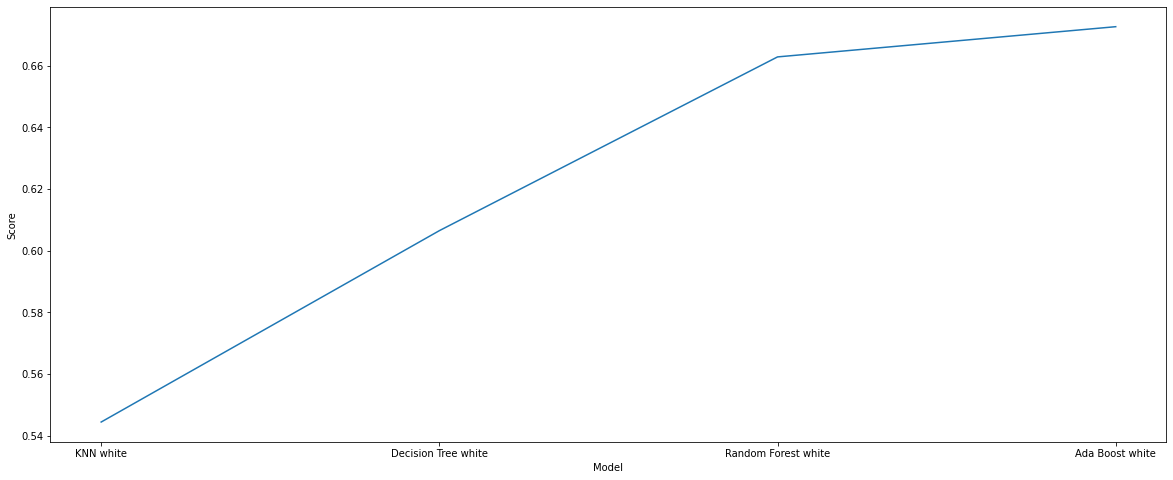

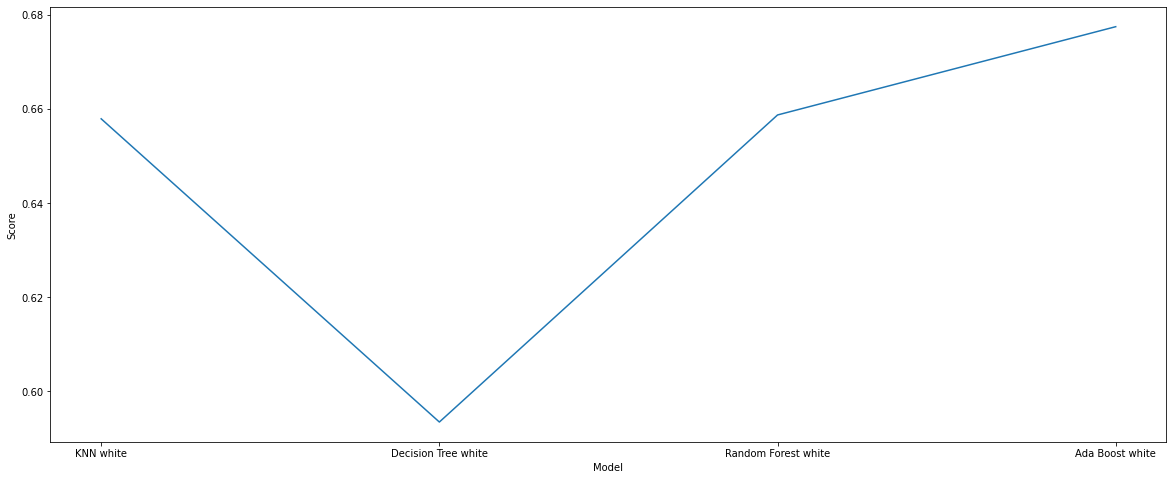

In [20]:
# Accuracy without hyper-parameters
plt.figure(figsize=(20, 8))
sns.lineplot(x='Model', y='Score', data=models_pre_white)

# Accuracy using best hyper-parameters from GridSearchCV
plt.figure(figsize=(20, 8))
sns.lineplot(x='Model', y='Score', data=models_post_white)
plt.show()

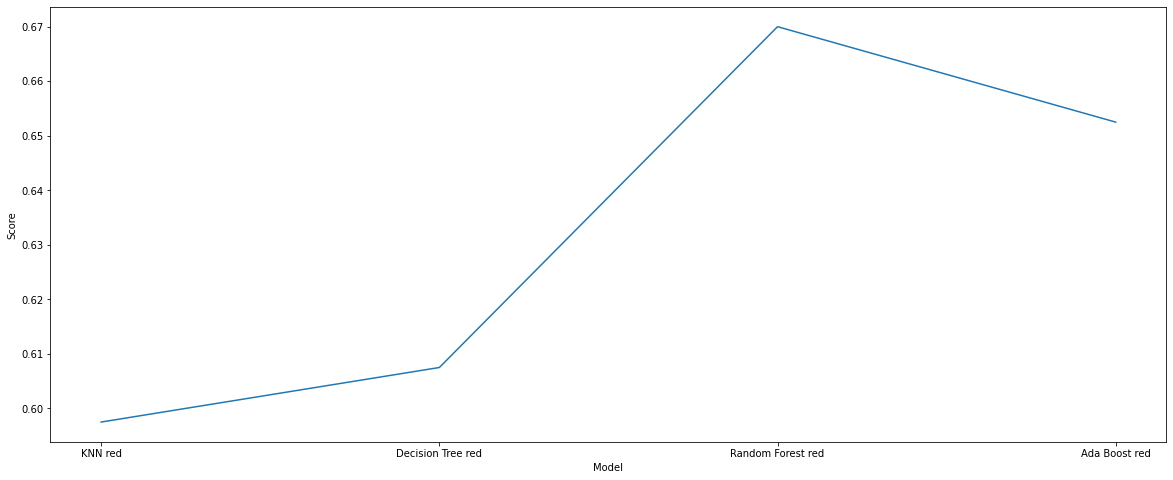

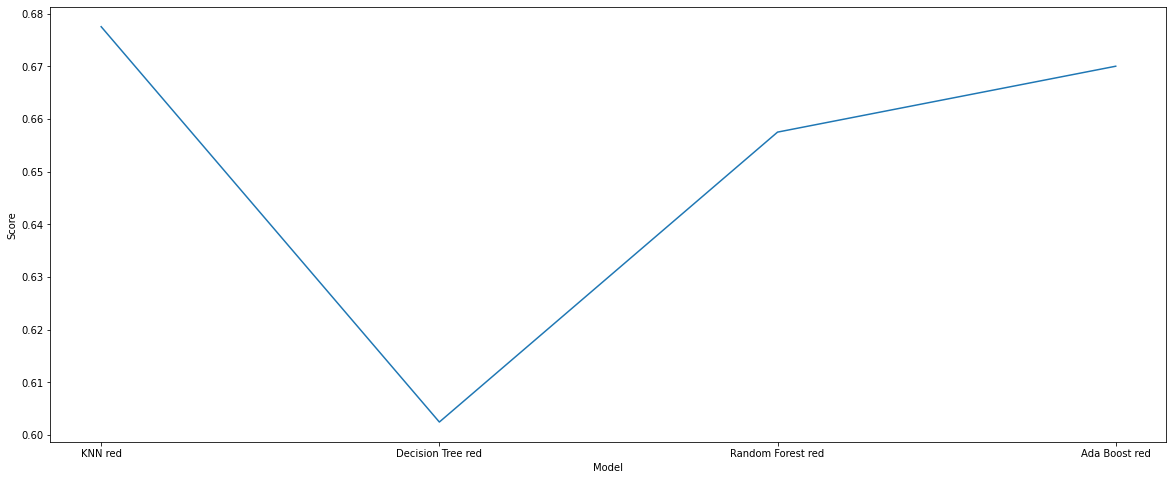

In [21]:
# Accuracy without hyper-parameters
plt.figure(figsize=(20, 8))
sns.lineplot(x='Model', y='Score', data=models_pre_red)

# Accuracy using best hyper-parameters from GridSearchCV
plt.figure(figsize=(20, 8))
sns.lineplot(x='Model', y='Score', data=models_post_red)
plt.show()

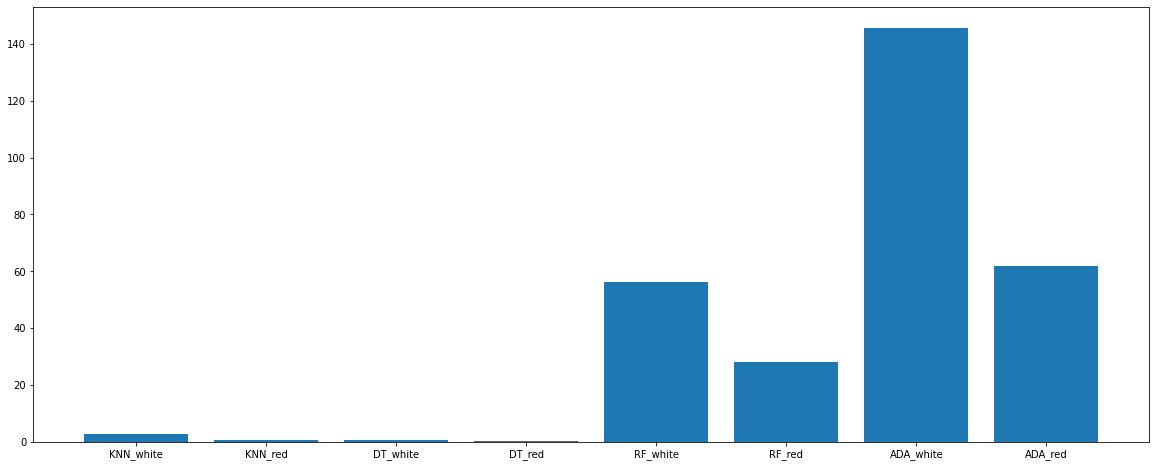

In [25]:
# How long each classifier took
plt.figure(figsize=(20, 8))
plt.bar(range(len(time_dict)), list(time_dict.values()), align='center')
plt.xticks(range(len(time_dict)), list(time_dict.keys()))

plt.show()